# Exploratory data analysis ahead of the first milestone

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pvh95/dl_reddit_meme/blob/main/memes_exploratory.ipynb)

In [1]:
import pandas as pd
print("pandas: {}".format(pd.__version__))

import matplotlib.pyplot as plt

pandas: 1.3.4


**Reading in the memes.csv**

memes.csv is the text information output of our scraping tool

In [2]:
memes = pd.read_csv('./output/memes.csv')


In [3]:
memes

,id,title,score,fname
0,2011.02.16_0,Scumbag Reddit,0,2011.02.16_0.jpg
1,2011.03.15_0,Xpost from pics. Oriental-Stereotype Wolf.,5,2011.03.15_0.jpg
2,2011.04.30_0,Hipster Vault Boy,1,2011.04.30_0.jpg
3,2011.06.20_0,I drew this for a friend while having a conver...,0,2011.06.20_0.png
4,2011.06.22_0,Pai Troll,1,2011.06.22_0.jpg
...,...,...,...,...
258310,2021.10.16_156,A rare siting of Ups trucks mating in the wild.,37,2021.10.16_156.png
258311,2021.10.16_157,Majestic eagles.,19,2021.10.16_157.png
258312,2021.10.16_158,This is what you get when you search 139808. J...,1,2021.10.16_158.png
258313,2021.10.16_159,looping in the life be like...,25,2021.10.16_159.png


**Number of memes scraped**

In [4]:
print(str(len(memes))+" memes between 2011.01.01 and 2021.10.16")

258315 memes between 2011.01.01 and 2021.10.16


**Transforming the concatenated dataset**

In [5]:
memes['date'] = memes['id'].str[:10]
memes['date'] = pd.to_datetime(memes['date'])
memes.head()

,id,title,score,fname,date
0,2011.02.16_0,Scumbag Reddit,0,2011.02.16_0.jpg,2011-02-16
1,2011.03.15_0,Xpost from pics. Oriental-Stereotype Wolf.,5,2011.03.15_0.jpg,2011-03-15
2,2011.04.30_0,Hipster Vault Boy,1,2011.04.30_0.jpg,2011-04-30
3,2011.06.20_0,I drew this for a friend while having a conver...,0,2011.06.20_0.png,2011-06-20
4,2011.06.22_0,Pai Troll,1,2011.06.22_0.jpg,2011-06-22


Columns of this dataset:
- **id** - unique identifier of each picture;
- **title** - the title of the picture scraped with the image;
- **score** - the number of score the meme received; 
- **date** - the day on which the meme was posted;

**Scatterplot - daily frequency of memes**

As we could see from the plot there are no instances from 2013. Turns out that the Reddit Api generator couldn't scrape any memes from 2013.

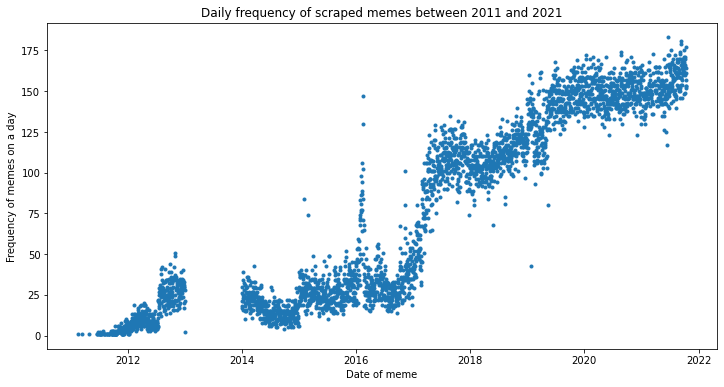

In [6]:
memes['date'].dt.date.value_counts().plot(style='.',figsize=(12, 6))
plt.title('Daily frequency of scraped memes between 2011 and 2021')
plt.xlabel('Date of meme')
plt.ylabel('Frequency of memes on a day')
plt.show()

**Bar chart - yearly frequency of memes**

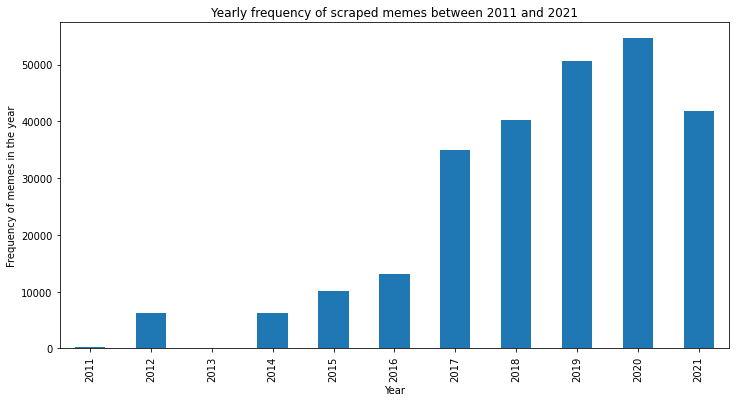

In [7]:
memes['date'].dt.year.value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(12, 6))
plt.title('Yearly frequency of scraped memes between 2011 and 2021')
plt.xlabel('Year')
plt.ylabel('Frequency of memes in the year')
plt.show()

**The ten most popular meme from the ten year scraping interval**

Notice how nine of them is from 2020, only one from 2019, none from earlier.

In [8]:
memes.sort_values('score', ascending=False).head(10)

,id,title,score,fname,date
193933,2020.08.03_109,Can we please just let this meme die already?,147454,2020.08.03_109.png,2020-08-03
226673,2021.03.15_77,pizza time stops,144751,2021.03.15_77.png,2021-03-15
209899,2020.11.17_136,More like physics but whatever.,140155,2020.11.17_136.png,2020-11-17
212674,2020.12.06_72,I do it every time,134602,2020.12.06_72.png,2020-12-06
219191,2021.01.19_9,Brrrrr 🪳,131969,2021.01.19_9.png,2021-01-19
234818,2021.05.21_22,Excuse me but wtf,130923,2021.05.21_22.png,2021-05-21
237348,2021.06.07_23,Damn you Microsoft Word!!!,124533,2021.06.07_23.png,2021-06-07
216801,2021.01.02_144,Checkmate,121067,2021.01.02_144.png,2021-01-02
232593,2021.05.06_28,Thanos did it for Death,119228,2021.05.06_28.png,2021-05-06
180617,2020.05.05_13,It is quite the big sad,118953,2020.05.05_13.png,2020-05-05


**Analysis of the distribution among scores**

*Analyzing different thresholds (how many memes have more than 100k, 10k etc. scores)*

In [9]:
for i in reversed(range(6)):
    print('{} memes have more than {} scores, {:.2f}% of the dataset.'.format(sum(memes['score']>10**i),10**i,
                                                                    sum(memes['score']>10**i)/len(memes)*100))

17 memes have more than 100000 scores, 0.01% of the dataset.
3097 memes have more than 10000 scores, 1.20% of the dataset.
11733 memes have more than 1000 scores, 4.54% of the dataset.
36157 memes have more than 100 scores, 14.00% of the dataset.
151454 memes have more than 10 scores, 58.63% of the dataset.
174902 memes have more than 1 scores, 67.71% of the dataset.


*Analyzing different percentiles*

In [10]:
for p in [0.99, 0.95, 0.9, 0.75]:
    print("The {:.0f}th percentile of the scores is at {:.0f}.".format(p*100,memes['score'].quantile(p)))

The 99th percentile of the scores is at 11896.
The 95th percentile of the scores is at 791.
The 90th percentile of the scores is at 172.
The 75th percentile of the scores is at 53.


**Scatterplot - scores of memes**

*First on linear scale* - not a lot can be read from the early years.

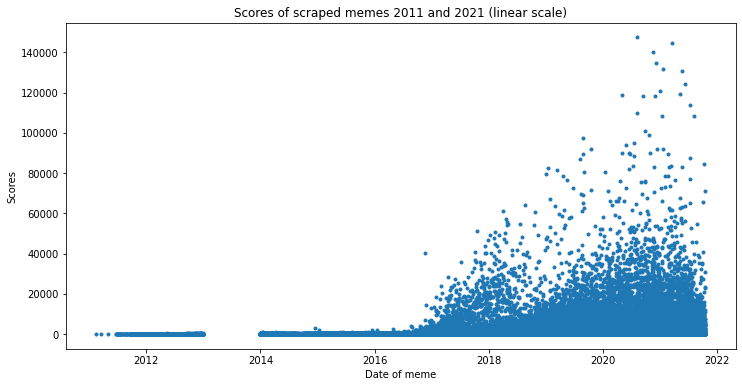

In [11]:
plt.figure(figsize=(12,6))
plt.plot(memes['date'], memes['score'], 'o', markersize=3)
plt.title('Scores of scraped memes 2011 and 2021 (linear scale)')
plt.xlabel('Date of meme')
plt.ylabel('Scores')
plt.show()

*Then on logarithmic scale* - notice that memes were able to reach a new magnitude of popularity by 2017, probably because the website (Reddit) was less popular the more we look back in the past.

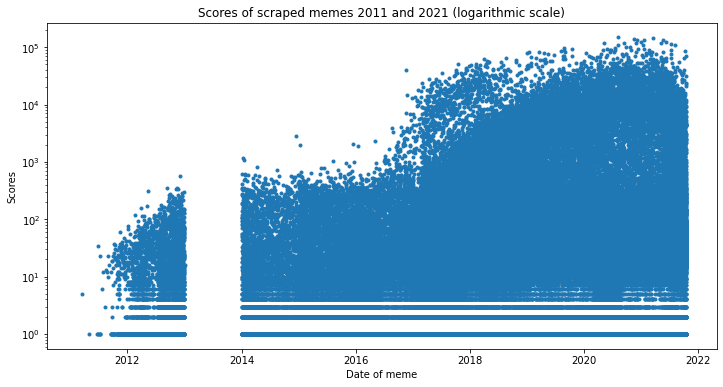

In [12]:
plt.figure(figsize=(12,6))
plt.plot(memes['date'], memes['score'], 'o', markersize=3)
plt.title('Scores of scraped memes 2011 and 2021 (logarithmic scale)')
plt.xlabel('Date of meme')
plt.ylabel('Scores')
plt.yscale('log')
plt.show()

**Visualizing all memes by sorting them by scores**

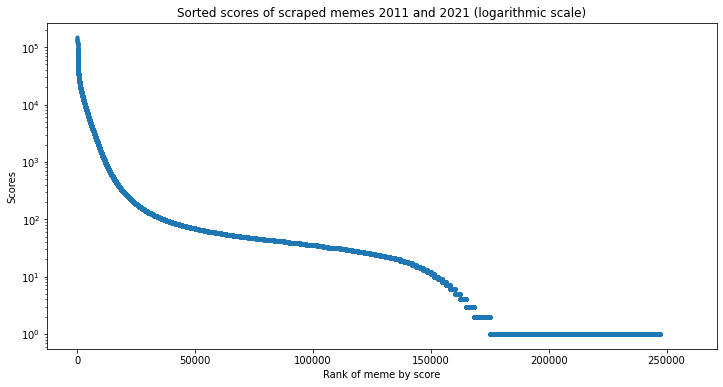

In [13]:
memes['score'].sort_values(ascending=False).reset_index(drop=True).plot(style='.',figsize=(12, 6))
plt.title('Sorted scores of scraped memes 2011 and 2021 (logarithmic scale)')
plt.xlabel('Rank of meme by score')
plt.ylabel('Scores')
plt.yscale('log')
plt.show()

**Preparation for learning - labeling the memes**

In our approach, we consider a meme "popular", "viral" or "dank", if it receives more scores than the memes around it. To be exact, we will be looking at the week around the meme (+/- 3 days, as well as the day the meme was posted). If the scores is in the 95th percentile in that window, the meme will be considered dank.

In [14]:
def window_filter(date, df=memes, before=3, after=3):
    """
    window_filter filters the given dataset, so that it only returns rows in a given date range.
    
    :param date: the central date of the window, it will always be kept in the filtered dataframe
    :param df: the dataset which is being filtered, by default the memes dataset
    :param before: number of days before the date parameter which is kept in the filtered dataframe (3 by default)
    :param after: number of days after the date parameter which is kept in the filtered dataframe (3 by default)
    :return: a data frame which covers rows from a before+after+1 long date range, centered in date
    """
    start = pd.to_datetime(date)-pd.DateOffset(before)
    end = pd.to_datetime(date)+pd.DateOffset(after)
    return df[(df['date'] >= start) & (df['date'] <= end)]

**Create a dataframe where the scores and the "dank" threshold can be compared**

Is_Dank is a new binary indicator variable which is 1 if it is popular enough, described above.

In [15]:
data=[]
for index, row in memes.iterrows():
    data.append([row['id'],  row['score'],
                 window_filter(row['date']).quantile(0.95)[0],
                 int(row['score']>window_filter(row['date']).quantile(0.95)[0])])
    
dank = pd.DataFrame(data, columns=['id', 'score', 'threshold', 'is_dank'])
dank

,id,score,threshold,is_dank
0,2011.02.16_0,0,0.00,0
1,2011.03.15_0,5,5.00,0
2,2011.04.30_0,1,1.00,0
3,2011.06.20_0,0,0.95,0
4,2011.06.22_0,1,0.95,1
...,...,...,...,...
258310,2021.10.16_156,37,625.00,0
258311,2021.10.16_157,19,625.00,0
258312,2021.10.16_158,1,625.00,0
258313,2021.10.16_159,25,625.00,0


**Copying the binary variable to the main dataframe, exporting as .csv**

In [16]:
memes['is_dank'] = dank['is_dank']
memes

,id,title,score,fname,date,is_dank
0,2011.02.16_0,Scumbag Reddit,0,2011.02.16_0.jpg,2011-02-16,0
1,2011.03.15_0,Xpost from pics. Oriental-Stereotype Wolf.,5,2011.03.15_0.jpg,2011-03-15,0
2,2011.04.30_0,Hipster Vault Boy,1,2011.04.30_0.jpg,2011-04-30,0
3,2011.06.20_0,I drew this for a friend while having a conver...,0,2011.06.20_0.png,2011-06-20,0
4,2011.06.22_0,Pai Troll,1,2011.06.22_0.jpg,2011-06-22,1
...,...,...,...,...,...,...
258310,2021.10.16_156,A rare siting of Ups trucks mating in the wild.,37,2021.10.16_156.png,2021-10-16,0
258311,2021.10.16_157,Majestic eagles.,19,2021.10.16_157.png,2021-10-16,0
258312,2021.10.16_158,This is what you get when you search 139808. J...,1,2021.10.16_158.png,2021-10-16,0
258313,2021.10.16_159,looping in the life be like...,25,2021.10.16_159.png,2021-10-16,0


In [17]:
print('{} memes are considered "dank" from the dataset, a ratio of {:.2f}%'.format(
    sum(memes['is_dank']),sum(memes['is_dank'])/len(memes)*100))

13142 memes are considered "dank" from the dataset, a ratio of 5.09%


In [18]:
memes.to_csv('./output/memes_prepared.csv', index = False)